In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

In [3]:
# Set device to CUDA if available, otherwise use CPU
device = tf.device('/gpu:0' if tf.test.is_gpu_available() else '/cpu:0')

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Reshape and normalize data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0

# Define the data augmentation
train_image_generator = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.3
)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(20, kernel_size=5, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(50, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# Train the model with data augmentation
history = model.fit(train_image_generator.flow(train_images, train_labels, batch_size=32), epochs=1, validation_data=(test_images, test_labels), callbacks=callbacks)

# Load best weights
model.load_weights('best_model.h5')

# Save the model to a file
model.save('my_model.h5')



Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


1875/1875 [==============================] - 105s 55ms/step - loss: 0.7870 - accuracy: 0.7368 - val_loss: 0.2091 - val_accuracy: 0.9310


In [4]:
# Train the model with data augmentation
history = model.fit(train_image_generator.flow(train_images, train_labels, batch_size=32), epochs=1, validation_data=(test_images, test_labels), callbacks=callbacks)

# Print out training and validation metrics
print("Training accuracy: ", history.history['accuracy'])
print("Validation accuracy: ", history.history['val_accuracy'])
print("Training loss: ", history.history['loss'])
print("Validation loss: ", history.history['val_loss'])


1875/1875 [==============================] - 96s 51ms/step - loss: 0.3644 - accuracy: 0.8839 - val_loss: 0.1545 - val_accuracy: 0.9529
Training accuracy:  [0.8838666677474976]
Validation accuracy:  [0.9528999924659729]
Training loss:  [0.3643570840358734]
Validation loss:  [0.15446138381958008]


In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 500)              

conv2d_4 (5, 5, 1, 20)
20


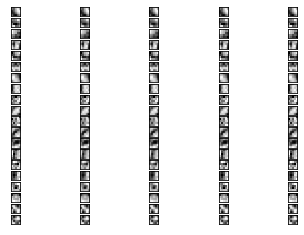

conv2d_5 (5, 5, 20, 50)
50


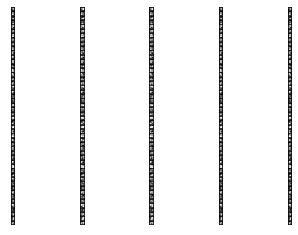

In [69]:
#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()
        print(layer.name, weights.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:,0], cmap='gray')
                filter_cnt+=1
        plt.show()

In [30]:
# Set device to CUDA if available, otherwise use CPU
device = tf.device('/gpu:0' if tf.test.is_gpu_available() else '/cpu:0')

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Reshape and normalize data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0

test_labels == 1

target_indices = np.where(test_labels == 1)[0]

print(target_indices)

print(np.where(test_labels == 1))

[   2    5   14 ... 9978 9984 9994]
(array([   2,    5,   14, ..., 9978, 9984, 9994]),)



#Feature maps: 
###In the initial layer of the network, the image's shape is mostly preserved, and a large amount of information from the image is retained. However, as we progress deeper into the network, the activations become increasingly complex and abstract, encoding high-level features such as edges, curves, and angles. Moreover, as we go deeper, we may observe that some of the filters are not getting activated, indicating that the model has reached its learning capacity.
#Bar Plots: 
###Conv Layer 2 gets activated more than Conv Layer 1. Comparably the magnitude of Conv Layer 2 activation percentage can get as high as close to 0.6 whereas Conv Layer 2 reaches to approximately 0.25. 

#Conclusion: 

### The higher activation percentage of Conv Layer 2 compared to Conv Layer 1 suggests that the former is capturing more high-level features than the latter. This could be because Conv Layer 2 is deeper in the network and has learned to encode more complex and abstract features compared to Conv Layer 1, which is closer to the input layer and has learned to encode simpler features such as edges and corners.

### The difference in the magnitude of activation percentages between the two layers further supports this idea. The relatively higher activation percentage of Conv Layer 2 suggests that it is detecting more complex and abstract features that are important for the task at hand, and thus has a higher contribution to the final output of the model.

# Real Test Data MNIST Activations : 

##Feature Maps

313/313 [==============================] - 4s 14ms/step
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)


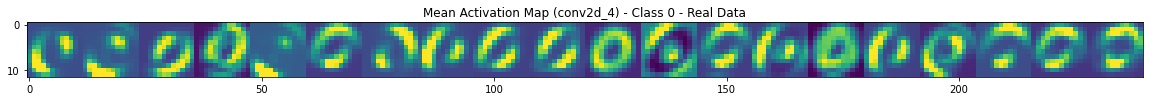

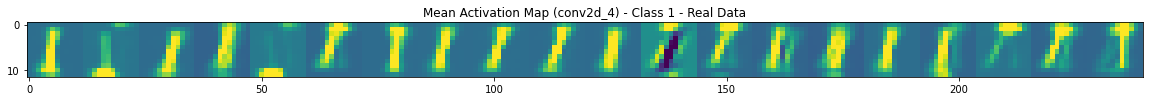

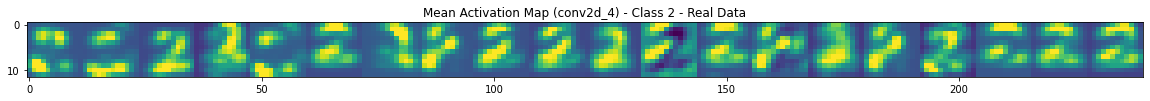

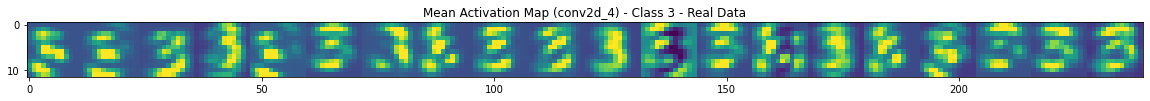

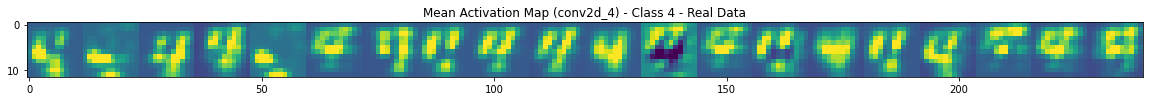

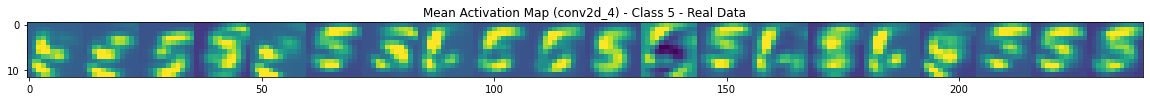

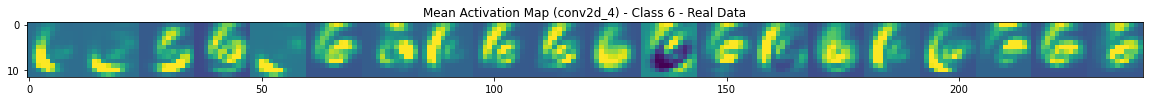

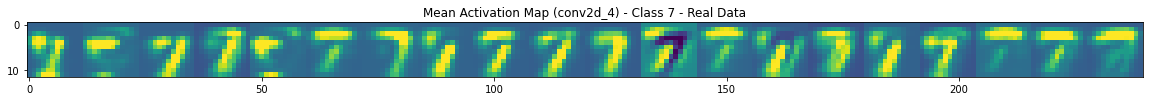

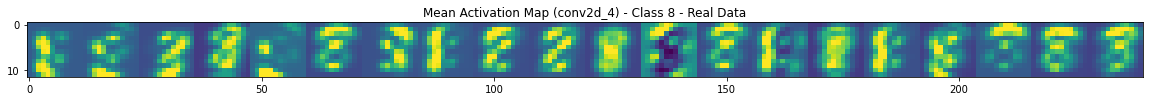

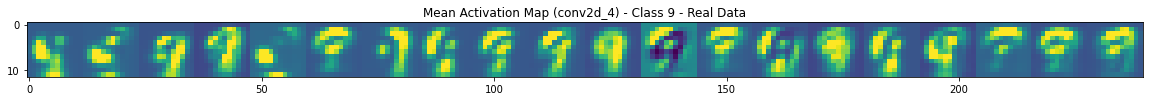

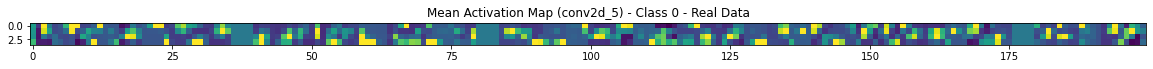

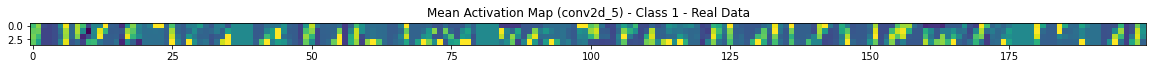

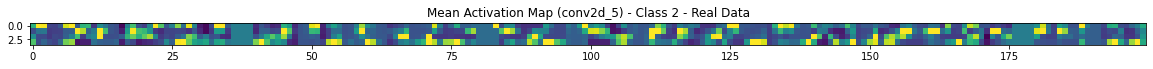

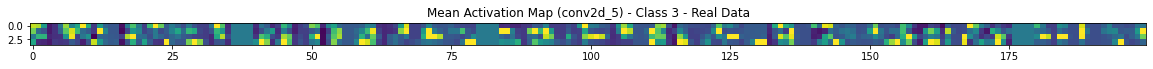

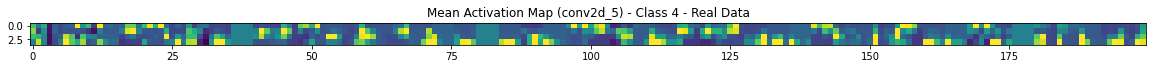

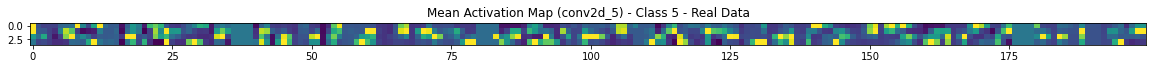

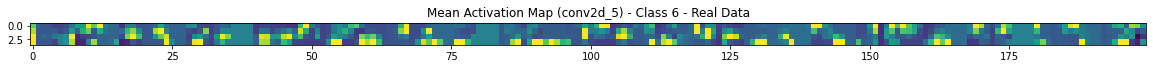

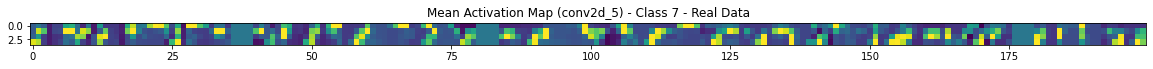

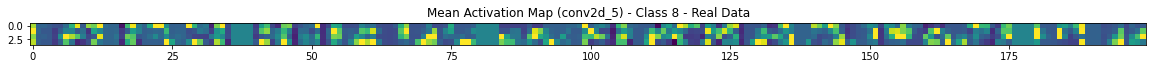

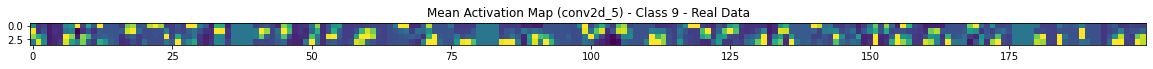

In [94]:
# Create a new array to store the reshaped images
input_images = np.zeros((test_images.shape[0], 28, 28, 1))

# Reshape each image to (1, 28, 28, 1) and store in input_images
for i in range(test_images.shape[0]):
    input_images[i] = test_images[i].reshape(28, 28, 1)

# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(input_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

  # Define the digits to generate noise maps for
  num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  # Loop over the classes
  for class_idx in num_classes:
    # Select the feature maps that correspond to the target class
    target_indices = np.where(test_labels == class_idx)[0]
    feature_maps_real = feature_map_real[target_indices]

    # Get the mean activation maps for real data and noise data separately
    mean_activation_map_real = np.mean(feature_maps_real, axis=(0))

    print(mean_activation_map_real.shape)
    if len(mean_activation_map_real.shape) == 3:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
      n_features = mean_activation_map_real.shape[-1]  # number of features in the feature map
      size = mean_activation_map_real.shape[1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
      for i in range(n_features):
          x  = mean_activation_map_real[:, :, i]
          x -= x.mean()
          x_std = x.std()
          x /= (x_std + 1e-7)
          x *=  64
          x += 128
          x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
      scale = 20. / n_features
      plt.figure( figsize=(scale * n_features, scale) )
      plt.title ( f"Mean Activation Map ({layer_name}) - Class {class_idx} - Real Data" )
      plt.grid  ( False )
      plt.imshow( display_grid, aspect='auto', cmap='viridis' )

##Convolutional Layer Activation Bar Plots

313/313 [==============================] - 9s 29ms/step


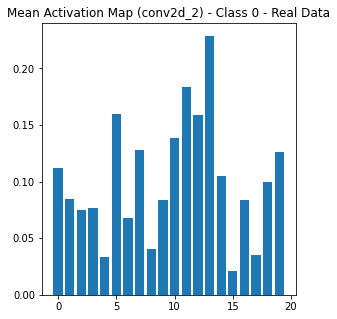

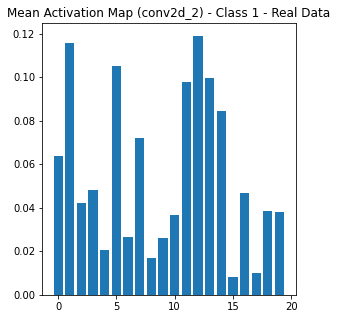

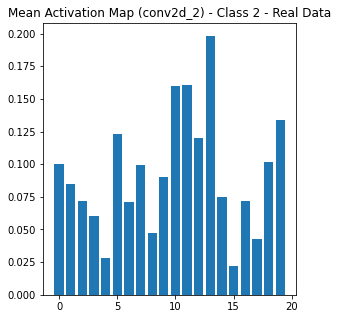

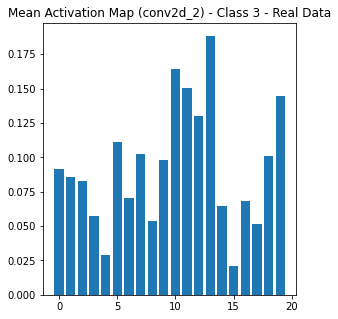

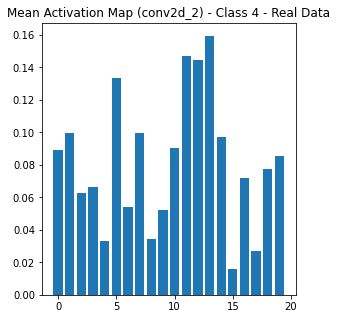

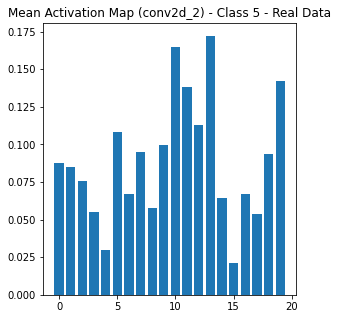

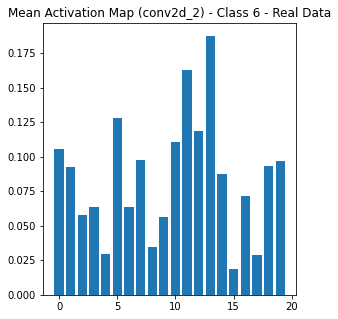

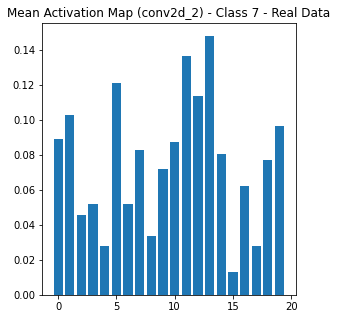

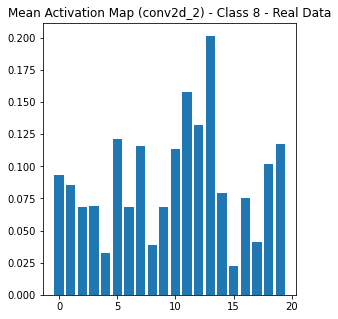

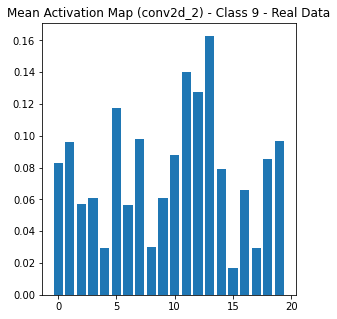

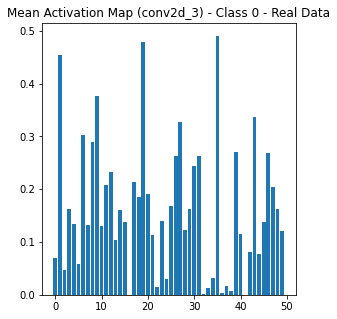

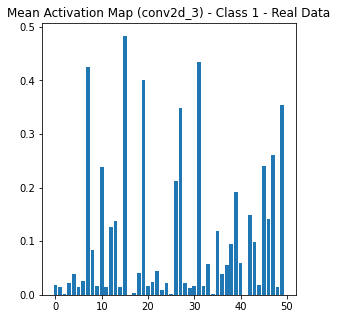

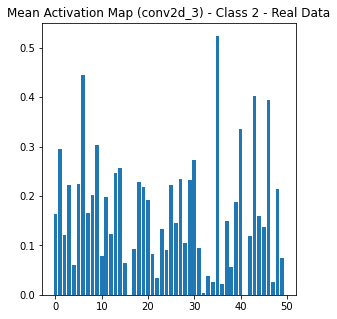

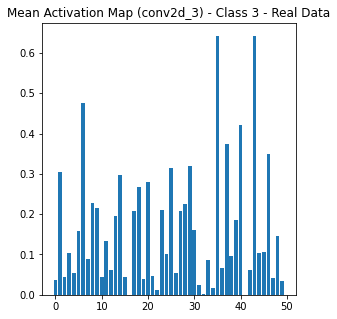

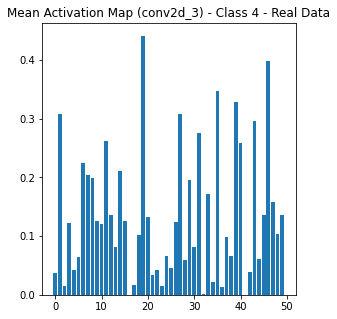

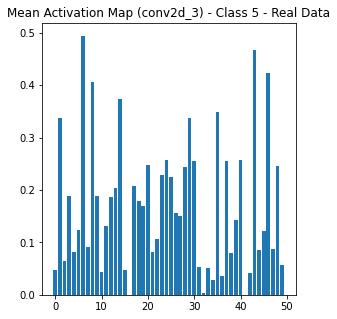

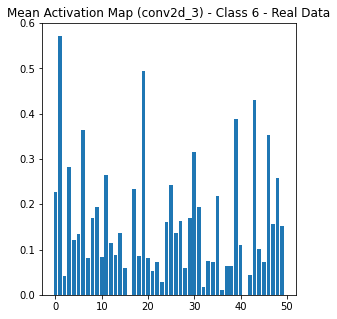

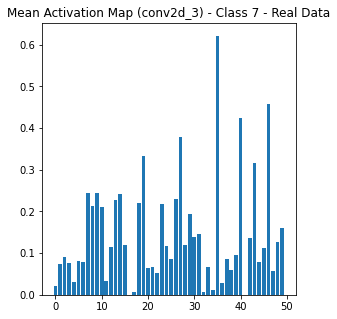

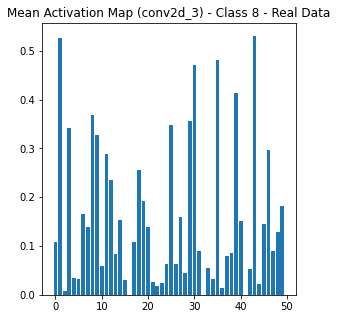

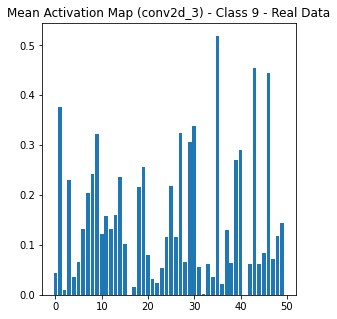

In [45]:
# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(test_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

  # Define the digits to generate noise maps for
  num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  # Loop over the classes
  for class_idx in num_classes:
    # Select the feature maps that correspond to the target class
    target_indices = np.where(test_labels == class_idx)[0]
    feature_maps_real = feature_map_real[target_indices]

    # Get the mean activation maps for real data and noise data separately
    mean_activation_map_real = np.mean(feature_maps_real, axis=(0,1,2))

    # Plot the mean activation maps for real and noise data side by side
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f"Mean Activation Map ({layer_name}) - Class {class_idx} - Real Data")
    plt.bar(range(n_filters), mean_activation_map_real)
    plt.show()


# Noisy image mean activation maps


### The noisy images: all_noise_maps

In [25]:

# Define the gamma value
gamma = 0.2

# Define the number of samples and image shape
n_samples = 500
img_shape = (28, 28)

# Define the digits to generate noise maps for
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def generate_noise_maps_per_digit(digit, n_samples, gamma, img_shape=(28, 28)):
    noise_maps = []
    labels = []
    mnist_dataset = MNIST(root='data/',train=False, download=True)
    digit_indices = np.where(np.array(mnist_dataset.targets) == digit)[0]
    digit_indices = digit_indices[:n_samples]
    for idx in digit_indices:
        # Get original image
        img = mnist_dataset.data[idx].numpy()
        # Generate random noise
        noise = np.random.randn(*img_shape)
        # Combine noise with original image
        noisy_img = gamma * noise + (1 - gamma) * img
        noise_maps.append(noisy_img)
        labels.append(digit)
    return np.array(noise_maps), np.array(labels)

# Generate noise maps for each digit and average them
noise_maps=[]
labels=[]
for digit in digits:
    digit_noise_maps, digit_labels = generate_noise_maps_per_digit(digit, n_samples, gamma, img_shape=(28,28))
    noise_maps.append(digit_noise_maps)
    labels.append(digit_labels)

all_noise_maps = np.concatenate(noise_maps)
all_labels = np.concatenate(labels)


## Feature Maps

157/157 [==============================] - 2s 12ms/step
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)


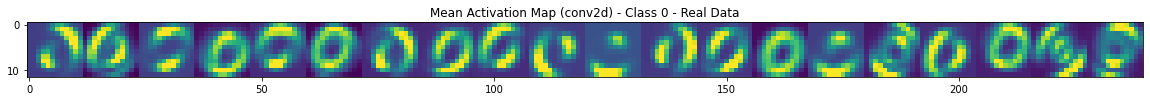

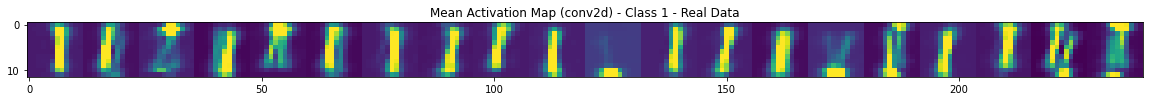

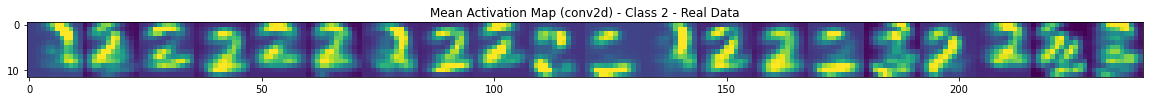

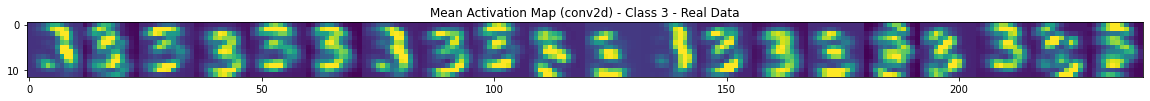

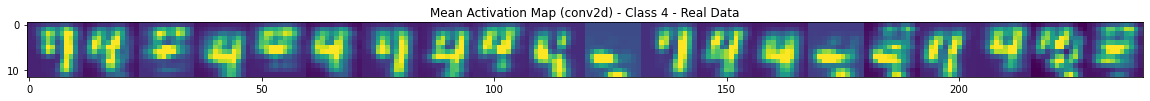

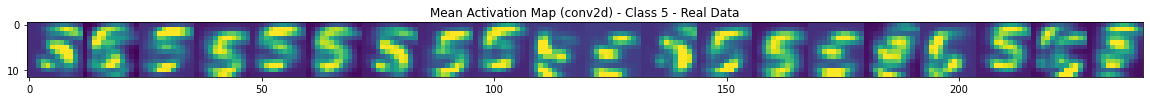

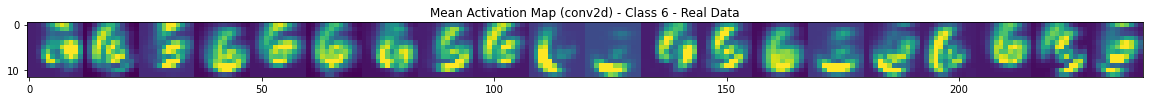

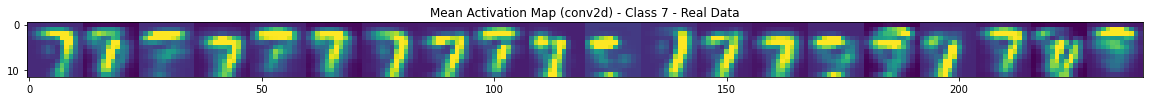

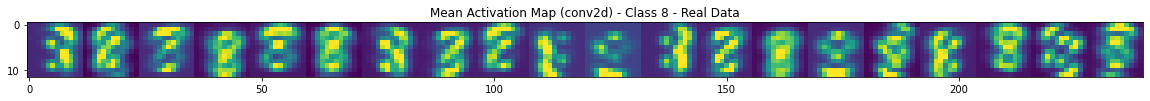

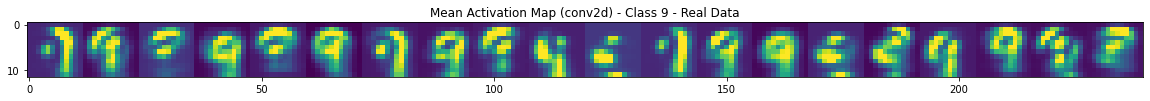

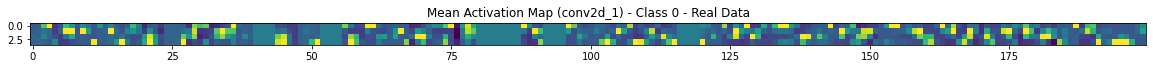

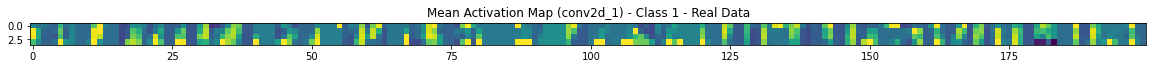

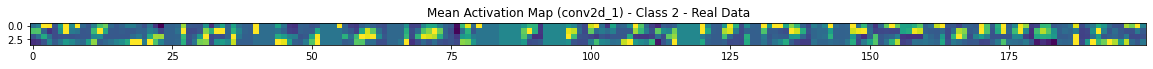

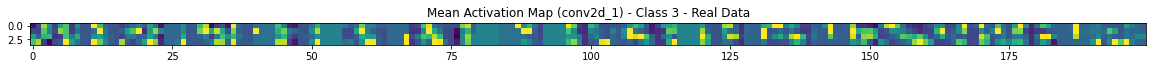

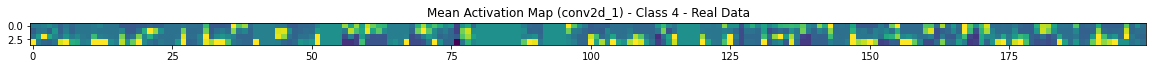

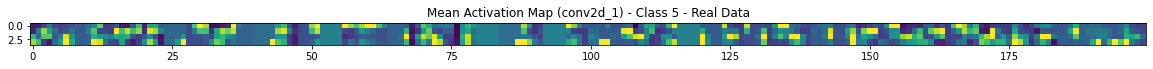

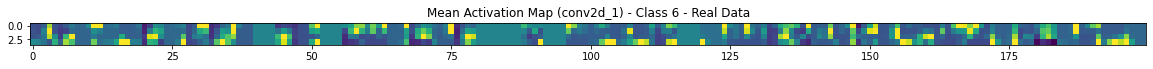

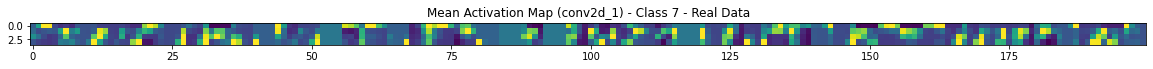

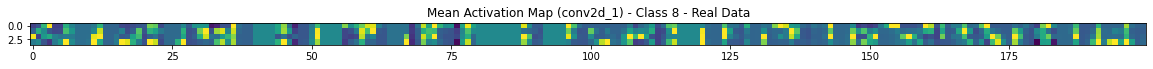

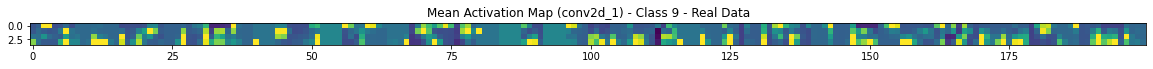

In [21]:
# Create a new array to store the reshaped images
input_images = np.zeros((all_noise_maps.shape[0], 28, 28, 1))

# Reshape each image to (1, 28, 28, 1) and store in input_images
for i in range(all_noise_maps.shape[0]):
    input_images[i] = all_noise_maps[i].reshape(28, 28, 1)

# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(input_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

  # Define the digits to generate noise maps for
  num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  # Loop over the classes
  for class_idx in num_classes:
    # Select the feature maps that correspond to the target class
    target_indices = np.where(all_labels == class_idx)[0]
    feature_maps_real = feature_map_real[target_indices]

    # Get the mean activation maps for real data and noise data separately
    mean_activation_map_real = np.mean(feature_maps_real, axis=(0))

    print(mean_activation_map_real.shape)
    if len(mean_activation_map_real.shape) == 3:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
      n_features = mean_activation_map_real.shape[-1]  # number of features in the feature map
      size = mean_activation_map_real.shape[1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
      for i in range(n_features):
          x  = mean_activation_map_real[:, :, i]
          x -= x.mean()
          x_std = x.std()
          x /= (x_std + 1e-7)
          x *=  64
          x += 128
          x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
      scale = 20. / n_features
      plt.figure( figsize=(scale * n_features, scale) )
      plt.title ( f"Mean Activation Map ({layer_name}) - Class {class_idx} - Real Data" )
      plt.grid  ( False )
      plt.imshow( display_grid, aspect='auto', cmap='viridis' )

## Bar Plots

157/157 [==============================] - 2s 12ms/step


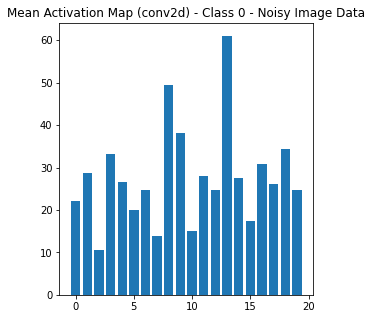

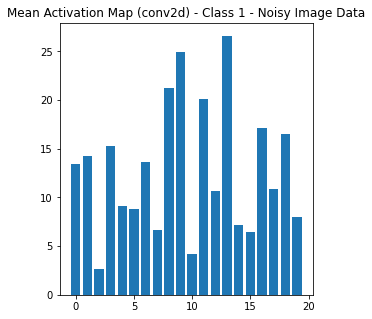

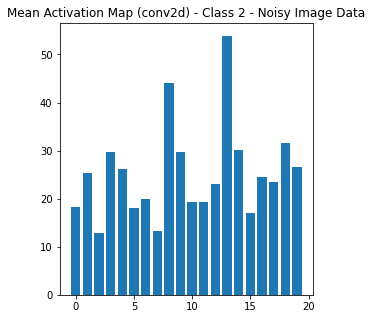

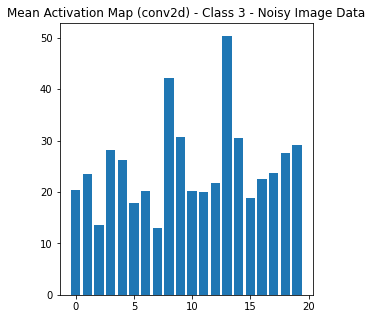

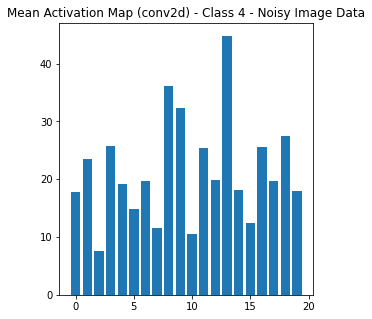

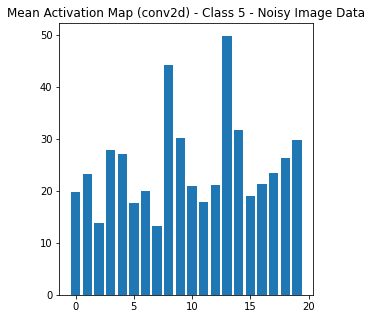

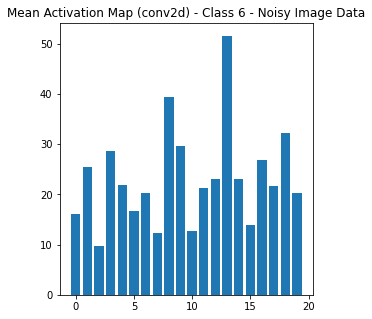

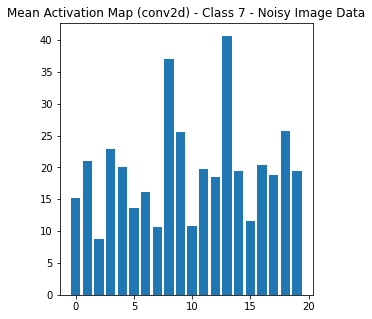

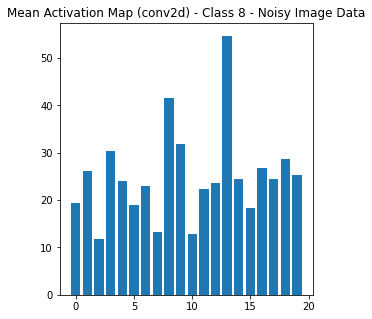

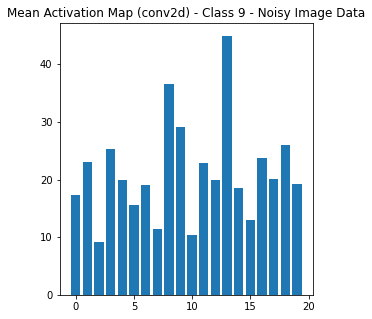

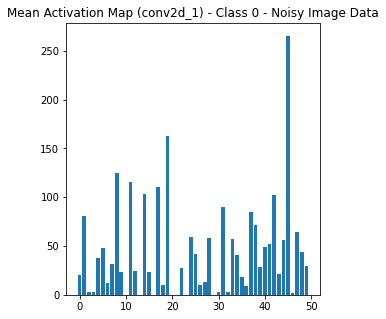

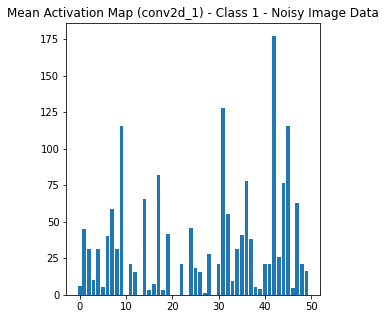

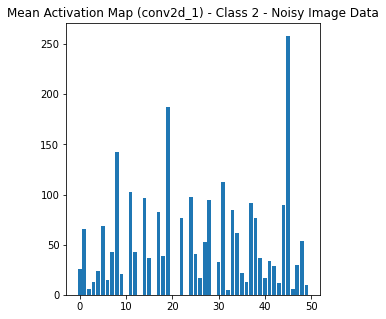

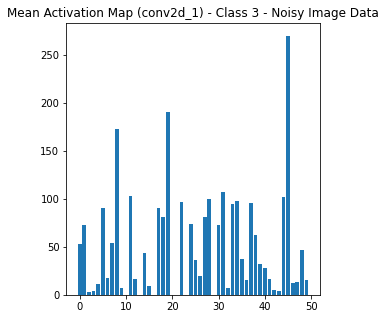

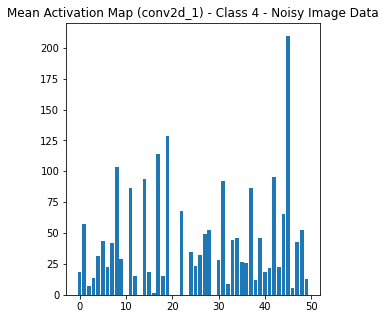

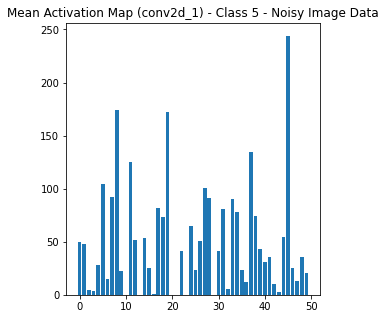

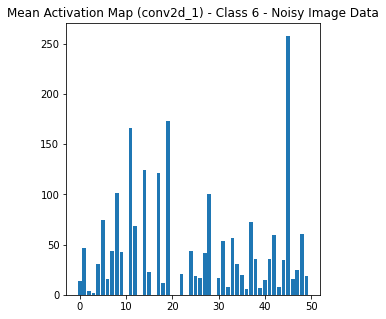

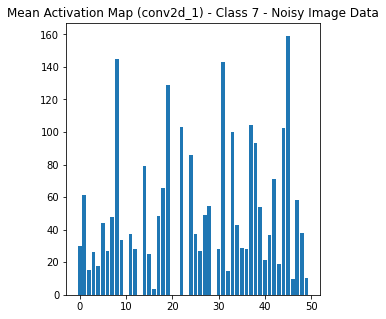

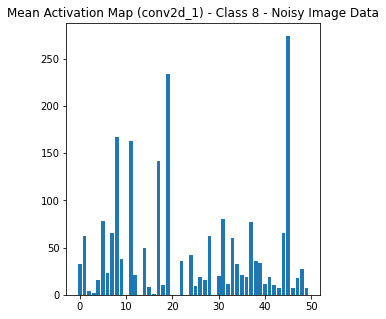

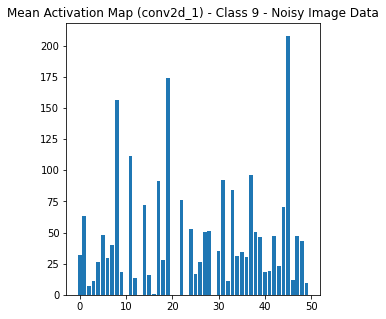

In [24]:
# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(all_noise_maps)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Loop over the layers
for layer_name, feature_map_noise in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_noise.shape[-1]

  # Define the digits to generate noise maps for
  num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  # Loop over the classes
  for class_idx in num_classes:
    # Select the feature maps that correspond to the target class
    target_indices = np.where(all_labels == class_idx)[0]
    feature_maps_noise = feature_map_noise[target_indices]

    # Get the mean activation maps for real data and noise data separately
    mean_activation_map_noise = np.mean(feature_maps_noise, axis=(0,1,2))

    # Plot the mean activation maps for real and noise data side by side
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f"Mean Activation Map ({layer_name}) - Class {class_idx} - Noisy Image Data")
    plt.bar(range(n_filters), mean_activation_map_noise)
    plt.show()


# One real image

In [77]:
# Set device to CUDA if available, otherwise use CPU
device = tf.device('/gpu:0' if tf.test.is_gpu_available() else '/cpu:0')

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Reshape and normalize data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0
print(test_images.shape)

(10000, 28, 28, 1)


(-0.5, 27.5, 27.5, -0.5)

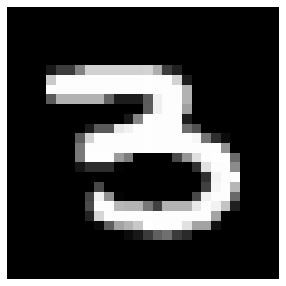

In [78]:
img = test_images[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

1/1 [==============================] - 0s 148ms/step
(1, 12, 12, 20)
(1, 8, 8, 50)
(1, 4, 4, 50)


<ipython-input-88-f3c4fd9afe30>:29: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


(1, 800)
(1, 500)
(1, 10)


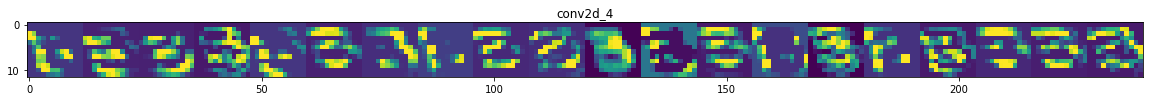

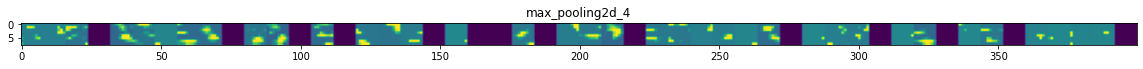

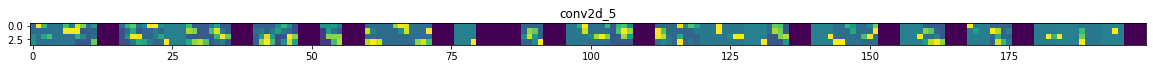

In [88]:
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's run input image through our visualization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(img)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

#One noisy image 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



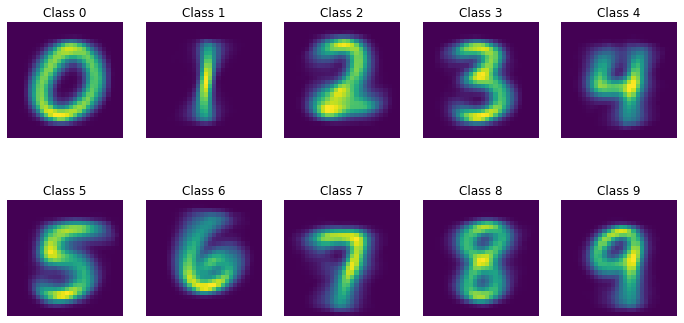

In [26]:
# Define the gamma value
gamma = 0.2

# Define the number of samples and image shape
n_samples = 500
img_shape = (28, 28)

# Define the digits to generate noise maps for
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def generate_noise_maps_per_digit(digit, n_samples, gamma, img_shape=(28, 28)):
    noise_maps = []
    mnist_dataset = MNIST(root='data/',train=False, download=True)
    digit_indices = np.where(np.array(mnist_dataset.targets) == digit)[0]
    digit_indices = digit_indices[:n_samples]
    for idx in digit_indices:
        # Get original image
        img = mnist_dataset.data[idx].numpy()
        # Generate random noise
        noise = np.random.randn(*img_shape)
        # Combine noise with original image
        noisy_img = gamma * noise + (1 - gamma) * img
        noise_maps.append(noisy_img)
    return np.array(noise_maps)

# Generate noise maps for each digit and average them
noise_maps=[]
avgd_noise_maps = []
for digit in digits:
    digit_noise_maps = generate_noise_maps_per_digit(digit, n_samples, gamma, img_shape=(28,28))
    avg_noise_map = np.mean(digit_noise_maps, axis=0)
    avgd_noise_maps.append(avg_noise_map)
    noise_maps.append(digit_noise_maps)

all_noise_maps = np.concatenate(noise_maps)
    

# Plot the noise maps
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(avgd_noise_maps[i])
    ax.set_title(f"Class {i}")
    ax.axis('off')
plt.show()

(-0.5, 27.5, 27.5, -0.5)

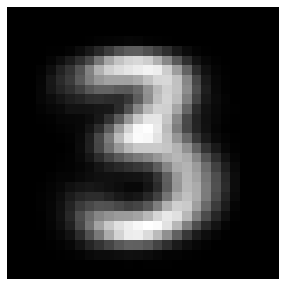

In [ ]:
img = avgd_noise_maps[3].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

1/1 [==============================] - 0s 74ms/step
(1, 12, 12, 20)
(1, 8, 8, 50)
(1, 4, 4, 50)


<ipython-input-47-6df6a09cd95e>:29: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


(1, 800)
(1, 500)
(1, 10)


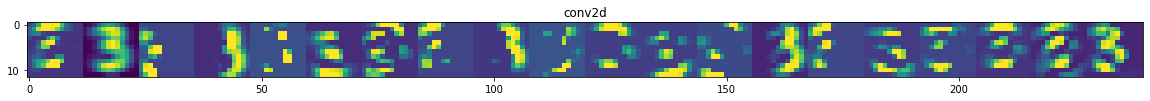

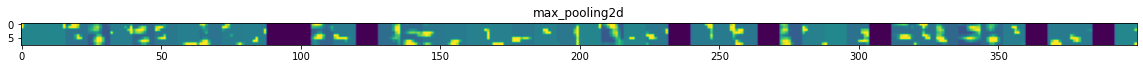

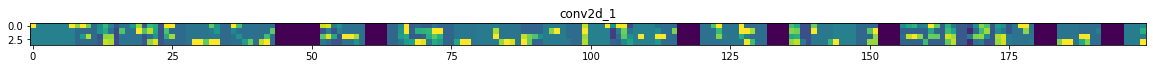

In [ ]:
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's run input image through our visualization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(img)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

# Notes

IndexError: ignored

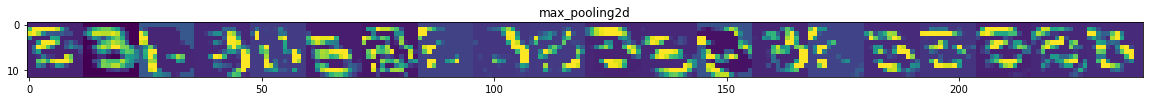

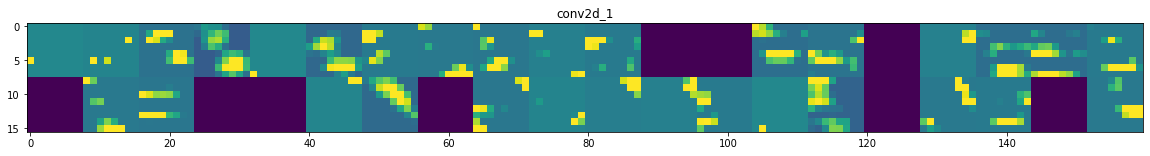

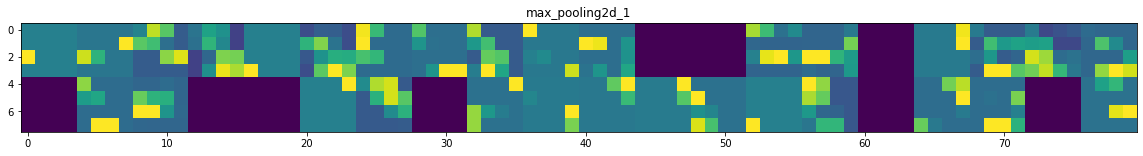

In [ ]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 20
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
size

800

IndexError: ignored

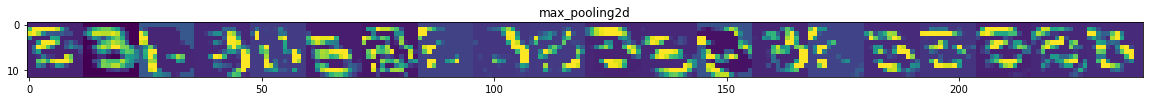

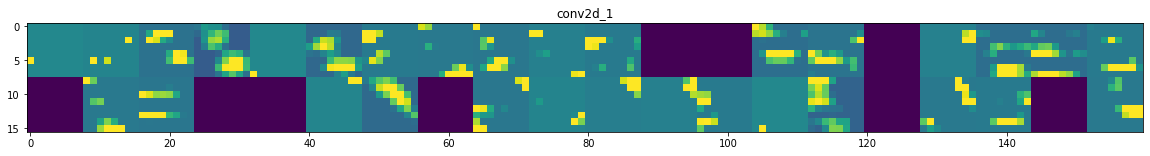

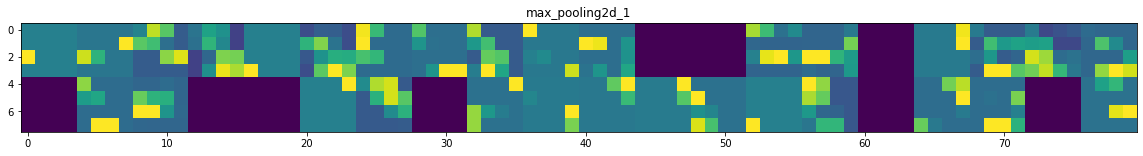

In [ ]:
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] # The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(min(n_cols, layer_activation.shape[3] // images_per_row)): # Limits the range of col to the number of available channels
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [ ]:
# Set device to CUDA if available, otherwise use CPU
device = tf.device('/gpu:0' if tf.test.is_gpu_available() else '/cpu:0')

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Reshape and normalize data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0

# Load the trained model
model = keras.models.load_model('/content/my_model.h5')

# Create a visualization model that outputs intermediate layer outputs
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[0].output)

# Choose a random test image
#img_index = np.random.randint(0, len(test_images))
#x = test_images[img_index]

x = test_images[3]
x = np.expand_dims(x, axis=0)


# Let's run input image through our visualization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)

# Retrieve the names of the layers, so we can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Plot the feature maps for the convolutional/maxpool layers, not the fully-connected layers
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Number of features in the feature map
        n_features = feature_map.shape[-1]
        # Feature map shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Create a matrix to tile the images
        display_grid = np.zeros((size, size * n_features))

        # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Set the figure size, title, grid, and colormap of the plot
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        
# Show the plot
plt.show()

1/1 [==============================] - 0s 104ms/step


In [ ]:

# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )


In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

# Create data loaders for the datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define the data augmentation
train_image_generator = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.3
)

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Apply data augmentation on training images
train_images = train_images.reshape(-1, 28, 28, 1)
train_images = train_images.astype('float32') / 255.
train_dataset = train_image_generator.flow(train_images, train_labels, batch_size=64)

# Preprocess the test data
test_images = test_images.reshape(-1, 28, 28, 1)
test_images = test_images.astype('float32') / 255.

# Create data loaders for the datasets
train_loader = tf.data.Dataset.from_generator(lambda: train_dataset, output_types=(tf.float32, tf.int32))
test_loader = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)


In [ ]:
# Set device to CUDA if available, otherwise use CPU
device = tf.device('/gpu:0' if tf.test.is_gpu_available() else '/cpu:0')

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Reshape and normalize data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(20, kernel_size=5, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(50, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), callbacks=callbacks)

# Load best weights
model.load_weights('best_model_mnist.h5')


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Epoch 1/20
 557/1875 [=======>......................] - ETA: 43s - loss: 0.2445 - accuracy: 0.9243

KeyboardInterrupt: ignored

In [ ]:
batch_size = 64 
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150


# define the model architecture
model = models.Sequential([
    layers.Conv2D(20, kernel_size=5, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(50, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# set the number of epochs
EPOCHS = 1

# train the model
for epoch in range(EPOCHS):
    # fit the model to the training data
    history = model.fit(train_loader,
                        epochs=1,
                        steps_per_epoch=60000 // 64,
                        validation_data=test_loader,
                         validation_steps=10000 // 64)
    
    # evaluate the model on the test set
    test_loss, test_acc = model.evaluate(test_loader)

    # print the loss and accuracy for this epoch
    print(f"Epoch {epoch+1}/{EPOCHS}, loss: {test_loss:.4f}, accuracy: {test_acc:.4f}")

    # save the model if it has the best accuracy so far
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        model.save("best_model.h5")
        print("Best model saved!")


ValueError: ignored